## Feature Engineering
### Ejemplos sencillos. Fuente: ChatGPT de ejemplos ya vistos en algunos modelos

Variables Categóricas:
- One Hot Encoding. Si tenemos 4 valores pasamos a 4 variables. Cuando tengamos muchos valores vamos a necesitar más técnicas: Label Encoding, Hash encoding

Variables Numéricas.
- StandardScaler. z-score. Valor - media / desviación estandar (std)
- Min-Max Scaler. Valores entre [0,1] (por defecto) o entre [-1,1]

PCA: Principal Component Analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Dataset simulado
df = pd.DataFrame({
    "age": [25, 45, 35, 50, 23],
    "education": ["HS-grad", "Bachelors", "Masters", "HS-grad", "PhD"],
    "income": [25000, 60000, 55000, 80000, 120000]
})

print("=== Dataset original ===")
print(df, "\n")

# 1. Valores categóricos -> OneHot
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(df[["education"]])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(["education"]))

print("=== Variables categóricas codificadas (OneHot) ===")
print(encoded_df, "\n")


=== Dataset original ===
   age  education  income
0   25    HS-grad   25000
1   45  Bachelors   60000
2   35    Masters   55000
3   50    HS-grad   80000
4   23        PhD  120000 

=== Variables categóricas codificadas (OneHot) ===
   education_Bachelors  education_HS-grad  education_Masters  education_PhD
0                  0.0                1.0                0.0            0.0
1                  1.0                0.0                0.0            0.0
2                  0.0                0.0                1.0            0.0
3                  0.0                1.0                0.0            0.0
4                  0.0                0.0                0.0            1.0 



In [4]:
# 2. Escalado numérico
scaler = StandardScaler()
scaled = scaler.fit_transform(df[["age", "income"]])
scaled_df = pd.DataFrame(scaled, columns=["age_scaled", "income_scaled"])

print("=== Variables numéricas escaladas (Z-score) ===")
print(scaled_df, "\n")

=== Variables numéricas escaladas (Z-score) ===
   age_scaled  income_scaled
0   -0.995228      -1.369399
1    0.882561      -0.254772
2   -0.056334      -0.414004
3    1.352008       0.382158
4   -1.183007       1.656017 



=== Variables numéricas escaladas (Z-score) ===
   age_scaled  income_scaled
0   -0.995228      -1.369399
1    0.882561      -0.254772
2   -0.056334      -0.414004
3    1.352008       0.382158
4   -1.183007       1.656017 



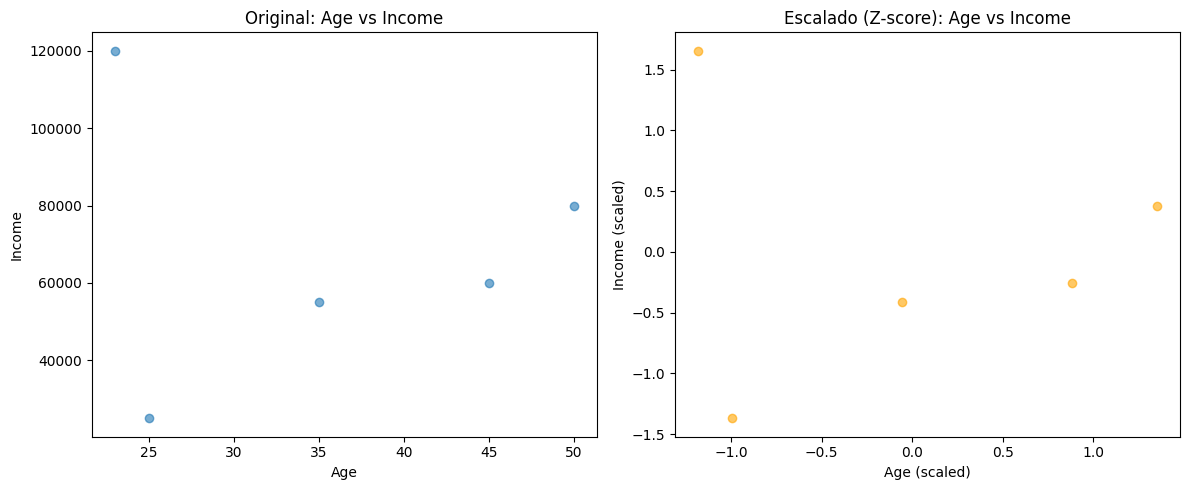

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 2. Escalado numérico
scaler = StandardScaler()
scaled = scaler.fit_transform(df[["age", "income"]])
scaled_df = pd.DataFrame(scaled, columns=["age_scaled", "income_scaled"])

print("=== Variables numéricas escaladas (Z-score) ===")
print(scaled_df, "\n")

# 3. Visualización antes y después del escalado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter original
axes[0].scatter(df["age"], df["income"], alpha=0.6)
axes[0].set_title("Original: Age vs Income")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Income")

# Scatter escalado
axes[1].scatter(scaled_df["age_scaled"], scaled_df["income_scaled"], alpha=0.6, color="orange")
axes[1].set_title("Escalado (Z-score): Age vs Income")
axes[1].set_xlabel("Age (scaled)")
axes[1].set_ylabel("Income (scaled)")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Escalado Min-Max
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(df[["age", "income"]])
minmax_scaled_df = pd.DataFrame(minmax_scaled, columns=["age_minmax", "income_minmax"])

print("=== Variables numéricas escaladas (Min-Max) ===")
print(minmax_scaled_df, "\n")

=== Variables numéricas escaladas (Min-Max) ===
   age_minmax  income_minmax
0    0.074074       0.000000
1    0.814815       0.368421
2    0.444444       0.315789
3    1.000000       0.578947
4    0.000000       1.000000 



In [10]:
# 3. Dataset combinado
combined_df = pd.concat([scaled_df, encoded_df], axis=1)
print("=== Dataset combinado listo para ML ===")
print(combined_df, "\n")

=== Dataset combinado listo para ML ===
   age_scaled  income_scaled  education_Bachelors  education_HS-grad  \
0   -0.995228      -1.369399                  0.0                1.0   
1    0.882561      -0.254772                  1.0                0.0   
2   -0.056334      -0.414004                  0.0                0.0   
3    1.352008       0.382158                  0.0                1.0   
4   -1.183007       1.656017                  0.0                0.0   

   education_Masters  education_PhD  
0                0.0            0.0  
1                0.0            0.0  
2                1.0            0.0  
3                0.0            0.0  
4                0.0            1.0   



In [14]:
# 4. PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(combined_df)
pca_df = pd.DataFrame(pca_features, columns=["PCA1", "PCA2"])

print("=== Resultados tras PCA ===")
print(pca_df, "\n")

# Información adicional sobre varianza explicada
print("Varianza explicada por cada componente PCA:", pca.explained_variance_ratio_)

=== Resultados tras PCA ===
       PCA1      PCA2
0 -0.553319 -1.676123
1 -0.765352  0.691467
2 -0.264667 -0.344973
3 -0.650792  1.199368
4  2.234129  0.130261 

Varianza explicada por cada componente PCA: [0.46888485 0.35749807]


Varianza explicada por cada componente: [0.46888485 0.35749807]


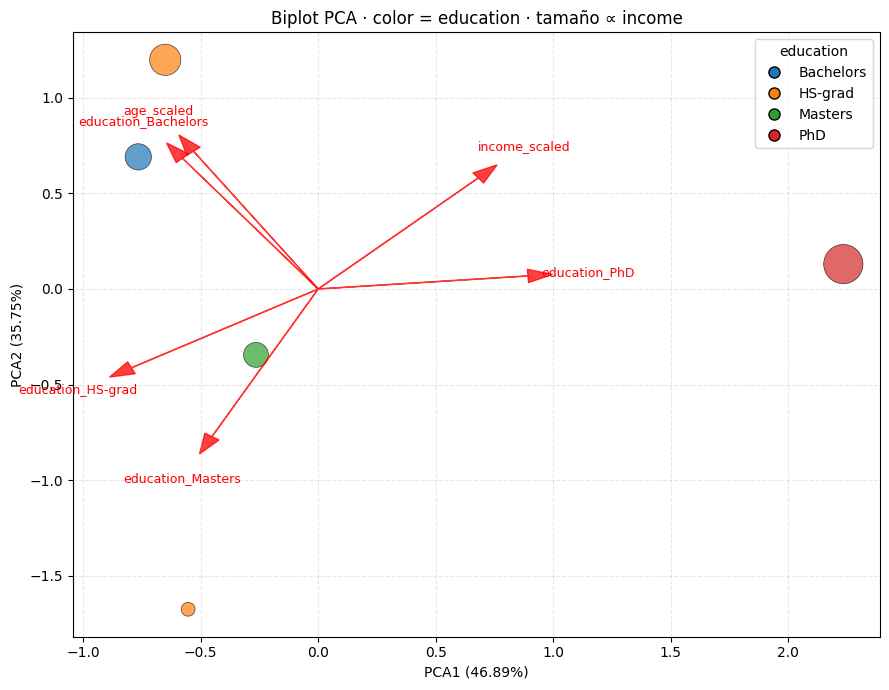

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib.cm import get_cmap

# === 1) PCA sobre columnas numéricas ===
X_num = combined_df.select_dtypes(include=[np.number])
feature_names = X_num.columns

pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_num)
pca_df = pd.DataFrame(pca_features, columns=["PCA1", "PCA2"])

# Añadir income y education desde df original
pca_df["income"] = df["income"].values
pca_df["education"] = df["education"].values

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

# === 2) Colores consistentes por categoría education ===
raw_edu = pca_df["education"]
edu_codes, edu_categories = pd.factorize(raw_edu, sort=True)
cmap = plt.get_cmap("tab10")

cat_to_color = {cat: cmap(i % cmap.N) for i, cat in enumerate(edu_categories)}
missing_color = (0.6, 0.6, 0.6, 1.0)  # gris para NaN

point_colors = [
    cat_to_color[val] if pd.notna(val) else missing_color
    for val in raw_edu
]

# === 3) Tamaños ∝ income ===
income = pca_df["income"].to_numpy(dtype=float)
inc_min, inc_max = np.nanmin(income), np.nanmax(income)
inc_norm = (income - inc_min) / (inc_max - inc_min + 1e-12)
sizes = 100 + inc_norm * 700

# === 4) Scatter de puntos ===
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(
    pca_df["PCA1"], pca_df["PCA2"],
    c=point_colors, s=sizes,
    alpha=0.7, edgecolor="k", linewidth=0.5
)

# === 5) Flechas del biplot (loadings normalizados) ===
loadings = pca.components_.T
norms = np.linalg.norm(loadings, axis=1, keepdims=True)
norms[norms == 0] = 1.0
loadings_norm = loadings / norms
arrow_scale = 1.0

for i, col in enumerate(feature_names):
    ax.arrow(
        0, 0,
        loadings_norm[i, 0] * arrow_scale,
        loadings_norm[i, 1] * arrow_scale,
        color="r", alpha=0.75, head_width=0.07, length_includes_head=True
    )
    ax.text(
        loadings_norm[i, 0] * 1.15,
        loadings_norm[i, 1] * 1.15,
        col, color="r", fontsize=9, ha="center", va="center"
    )

# === 6) Estética del gráfico ===
ax.set_xlabel(f"PCA1 ({pca.explained_variance_ratio_[0]:.2%})")
ax.set_ylabel(f"PCA2 ({pca.explained_variance_ratio_[1]:.2%})")
ax.set_title("Biplot PCA · color = education · tamaño ∝ income")
ax.grid(True, linestyle="--", alpha=0.3)

# === 7) Leyenda de categorías education ===
handles = [
    plt.Line2D([0],[0], marker='o', linestyle='', markerfacecolor=color,
               markeredgecolor='k', label=str(cat), markersize=8)
    for cat, color in cat_to_color.items()
]
if raw_edu.isna().any():
    handles.append(
        plt.Line2D([0],[0], marker='o', linestyle='', markerfacecolor=missing_color,
                   markeredgecolor='k', label='(missing)', markersize=8)
    )
ax.legend(handles=handles, title="education", loc="best", frameon=True)

plt.tight_layout()
plt.show()


🔵 Los puntos en el scatter

Cada círculo es un individuo (fila del dataset):

Posición → combinación de sus valores proyectados en PCA1 y PCA2.

Color → nivel educativo (education).

Tamaño → proporcional al income (a mayor salario, mayor radio del punto).

Ejemplo:

El PhD (23 años, income 120k) aparece como un círculo rojo grande, muy separado, porque su ingreso es muy alto y domina en PCA.

El HS-grad (25 años, income 25k) aparece pequeño y hacia el otro extremo.

🟥 Las flechas (biplot de loadings)

Muestran cómo contribuye cada variable original a las componentes:

income_scaled apunta hacia la derecha → indica que PCA1 recoge principalmente diferencias en ingresos.

age_scaled apunta hacia arriba → PCA2 diferencia por edad.

education_X: cada categoría de educación es una variable dummy, y su dirección indica con qué combinación de PCA se asocia.

Ejemplos:

education_PhD apunta a la derecha → casos con doctorado se alinean con valores altos de PCA1 (ingresos altos).

education_HS-grad apunta a la izquierda → se asocia con ingresos bajos.

education_Bachelors / Masters quedan más mezclados, hacia arriba/abajo según edad.

🔎 Interpretación integrada

Dimensión horizontal (PCA1): está dominada por income y la diferencia entre niveles educativos extremos (PhD vs HS-grad).
→ Eje “riqueza / nivel educativo alto”.

Dimensión vertical (PCA2): recoge sobre todo la edad.
→ Eje “edad joven vs edad mayor”.

Distribución de los puntos:

El estudiante de PhD con 120k queda muy separado a la derecha (alto income).

Los HS-grad se quedan a la izquierda (menores ingresos).

Bachelors y Masters quedan en posiciones intermedias, diferenciados por edad.

✅ Conclusión:
El PCA ha comprimido 6 variables (age + income + 4 dummies de educación) en 2 ejes principales:

PCA1 diferencia sobre todo nivel educativo asociado a ingresos.

PCA2 diferencia principalmente por edad.
La figura refleja que, incluso con pocas filas, el modelo capta que mayor nivel educativo suele asociarse a mayor salario, y que la edad también introduce separación adicional.